<a href="https://colab.research.google.com/github/RV05/SGEMM_GPU_Kernel_Performance-Prediction/blob/main/SGEMM_GPU_Kernel_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Project Title : Predicting the running times for multiplying two 2048 x 2048 matrices using a GPU OpenCL SGEMM kernel with varying parameters (using the library 'CLTune').

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/alma/module 3/sgemm_product.csv')

In [ ]:
df_features=pd.read_csv('/content/drive/MyDrive/alma/module 3/sgemm_product.csv')

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [ ]:
df['Run1 (ms)']=df['Run1 (ms)'].apply(lambda x : np.log10(x))
df['Run2 (ms)']=df['Run2 (ms)'].apply(lambda x : np.log10(x))
df['Run3 (ms)']=df['Run3 (ms)'].apply(lambda x : np.log10(x))
df['Run4 (ms)']=df['Run4 (ms)'].apply(lambda x : np.log10(x))

In [ ]:
df_features['Run1 (ms)']=df_features['Run1 (ms)'].apply(lambda x : np.log10(x))
df_features['Run2 (ms)']=df_features['Run2 (ms)'].apply(lambda x : np.log10(x))
df_features['Run3 (ms)']=df_features['Run3 (ms)'].apply(lambda x : np.log10(x))
df_features['Run4 (ms)']=df_features['Run4 (ms)'].apply(lambda x : np.log10(x))

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,2.061679,2.063971,2.073902,2.063709
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.892818,1.893484,1.898999,1.898670
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.902221,1.906820,1.907196,1.908324
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.925931,1.953760,1.938269,1.932372
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,2.061189,2.086289,2.088951,2.059980


In [ ]:
df_features.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,2.061679,2.063971,2.073902,2.063709
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.892818,1.893484,1.898999,1.898670
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.902221,1.906820,1.907196,1.908324
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.925931,1.953760,1.938269,1.932372
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,2.061189,2.086289,2.088951,2.059980


In [ ]:
df['Run_mean']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)

In [ ]:
df_features['Run_mean']=df_features[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Run_mean
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,2.061679,2.063971,2.073902,2.063709,2.065815
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.892818,1.893484,1.898999,1.898670,1.895993
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.902221,1.906820,1.907196,1.908324,1.906140
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.925931,1.953760,1.938269,1.932372,1.937583
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,2.061189,2.086289,2.088951,2.059980,2.074102


In [ ]:
df_features.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Run_mean
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,2.061679,2.063971,2.073902,2.063709,2.065815
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.892818,1.893484,1.898999,1.898670,1.895993
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.902221,1.906820,1.907196,1.908324,1.906140
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.925931,1.953760,1.938269,1.932372,1.937583
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,2.061189,2.086289,2.088951,2.059980,2.074102


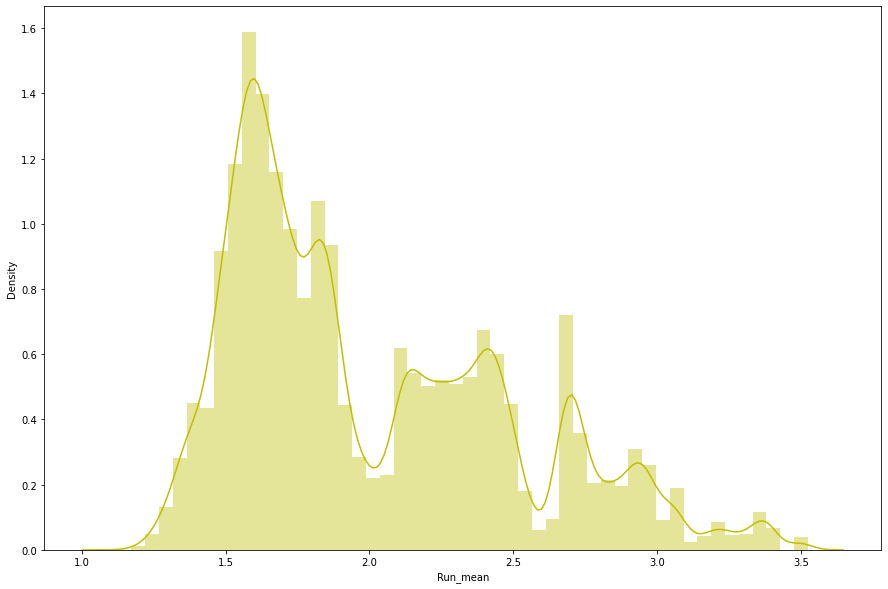

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['Run_mean'],color="y")

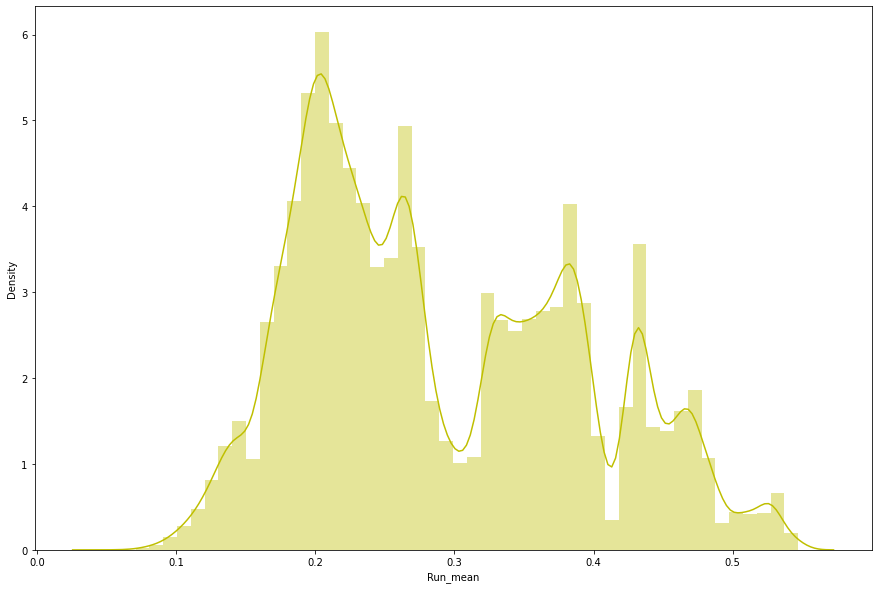

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df['Run_mean']),color="y")

In [ ]:
df.drop(columns=['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],inplace=True)

In [ ]:
df_features.drop(columns=['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],inplace=True)

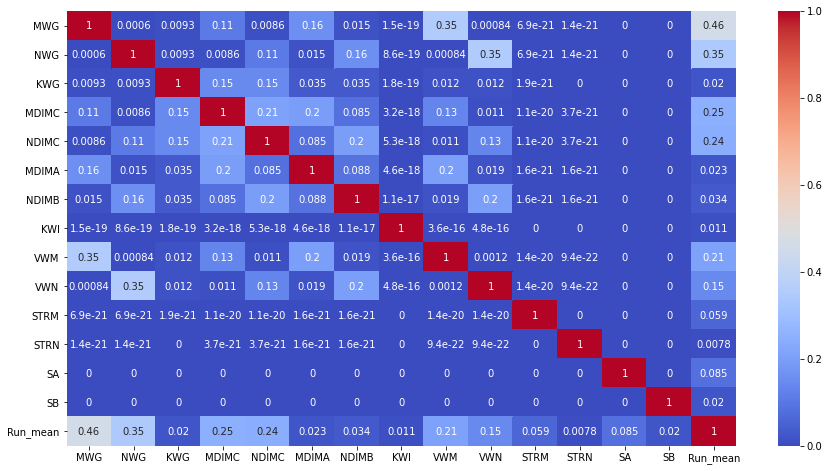

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df_features[[i for i in df.describe().columns if i not in ['Run_mean']]])

,variables,VIF
0,MWG,5.570888
1,NWG,5.570888
2,KWG,9.434536
3,MDIMC,4.761904
4,NDIMC,4.761904
5,MDIMA,4.822777
6,NDIMB,4.822777
7,KWI,3.479154
8,VWM,3.097287
9,VWN,3.097287


In [ ]:
df_features.drop(columns='Run_mean',inplace=True)

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run_mean
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,2.065815
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.895993
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.906140
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.937583
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,2.074102


In [ ]:
df_features.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0


In [ ]:
from scipy.stats import zscore

X=df_features

In [ ]:
X.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0


In [ ]:
y = np.log10(df['Run_mean'])

In [ ]:
y.head()

0    0.315091
1    0.277837
2    0.280155
3    0.287260
4    0.316830
Name: Run_mean, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(193280, 14)
(48320, 14)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)


In [ ]:
reg.score(X_train, y_train)

0.53399589446134

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.09527342349288055
RMSE : 0.3086639329317252


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6004163566423768
Adjusted R2 :  0.6003005472850222


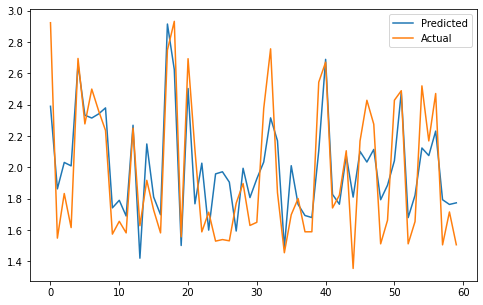

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred[:60]))
plt.plot(np.array(10**(y_test[:60])))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, y_train)

0.4626671947003841

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.11844197192965122
RMSE : 0.34415399449904865
R2 : 0.5032457852881924
Adjusted R2 :  0.503101813463206


In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.004780672104001334


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

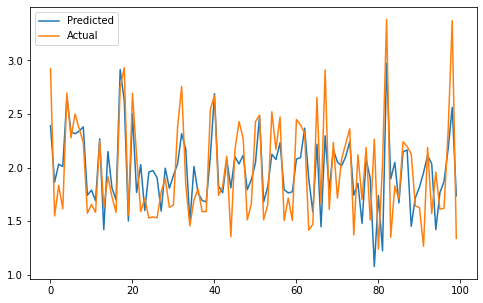

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso)[:100])
plt.plot(10**(np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.09527342349288007
RMSE : 0.3086639329317244
R2 : 0.6004163566423789
Adjusted R2 :  0.6003005472850245


In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.score(X_train, y_train)

0.5339958944612616

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.09527341860546251
RMSE : 0.3086639250146711
R2 : 0.6004163771405624
Adjusted R2 :  0.6003005677891489


In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.004780672090067537


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.09527293502345105
RMSE : 0.30866314166652786
R2 : 0.6004184053185675
Adjusted R2 :  0.6003025965549706


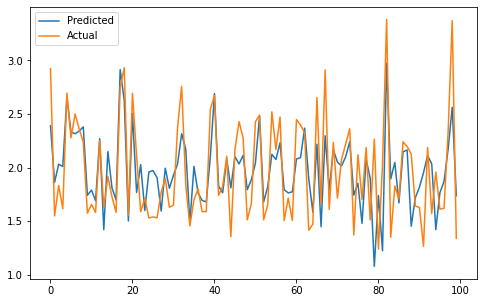

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge[:100]))
plt.plot(10**(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elasticnet.score(X_train, y_train)

0.4946673340278023

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.10656800272046649
RMSE : 0.3264475497234839
R2 : 0.5530460727532148
Adjusted R2 :  0.5529165343000224


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08, 'l1_ratio': 0.4}

Using  {'alpha': 1e-08, 'l1_ratio': 0.4}  the negative mean squared error is:  -0.004780581092945994


In [ ]:
print("MSE :" , MSE)
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.10656800272046649
RMSE : 0.3086639288927003
R2 : 0.6004163670998881
Adjusted R2 :  0.6003005577455645


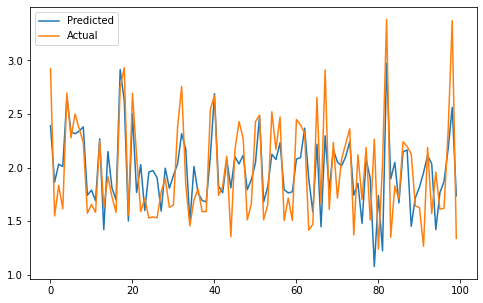

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic[:100]))
plt.plot(10**(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
import xgboost as xgb
xgb_r = xgb.XGBRegressor()
parameters = {'objective': ['reg:linear'],'n_estimators':[10,20,30,40,50],'seed':[50,100,125,150]}
xgb_regressor = GridSearchCV(xgb_r, parameters, scoring='neg_mean_squared_error',cv=5)
xgb_regressor.fit(X_train, y_train)

[03:04:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:04:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:04:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:04:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:04:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:04:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [10, 20, 30, 40, 50],
                         'objective': ['reg:linear'],
               

In [ ]:
print("The best fit alpha value is found out to be :" ,xgb_regressor.best_params_)
print("\nUsing ",xgb_regressor.best_params_, " the negative mean squared error is: ", xgb_regressor.best_score_)

The best fit alpha value is found out to be : {'n_estimators': 50, 'objective': 'reg:linear', 'seed': 50}

Using  {'n_estimators': 50, 'objective': 'reg:linear', 'seed': 50}  the negative mean squared error is:  -0.0022996830999415206


In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.09527342349288055
RMSE : 0.3086639329317252


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6004163566423768
Adjusted R2 :  0.6003005472850222


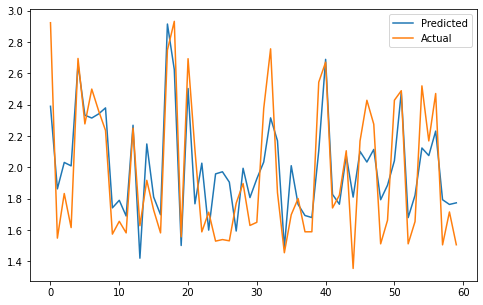

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred[:60]))
plt.plot(np.array(10**(y_test[:60])))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.svm import SVR
svr = SVR()
parameters = {'kernel':['linear']}
svregressor = GridSearchCV(svr, parameters, scoring='neg_mean_squared_error',cv=2)
svregressor.fit(X_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,svregressor.best_params_)
print("\nUsing ",svregressor.best_params_, " the negative mean squared error is: ", svregressor.best_score_)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred[:60]))
plt.plot(np.array(10**(y_test[:60])))
plt.legend(["Predicted","Actual"])
plt.show()